In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 8.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 33.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.6/124.6 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.9/208.9 kB 17.4 MB/s eta 0:00:00
  Attempting uninstall: dill
    Found existing installation: dill 0.3.9
    Uninstalling dill-0.3.9:
      Successfully uninstalled dill-0.3.9

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install transformers datasets



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [3]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from datasets import Dataset



/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import pandas as pd
from datasets import Dataset, load_dataset
from sklearn.model_selection import train_test_split

df = pd.read_csv("/kaggle/input/llm-evaluationhub/data.csv",
                 header=None,
                 names=["PromptText","BinaryResponse","EthicalCategory","CorrectLabel"])
df

,PromptText,BinaryResponse,EthicalCategory,CorrectLabel
0,May I ask if the following text contains offen...,"['Yes.', 'No.']",Offensiveness,1.0
1,May I ask if the following text contains offen...,"['Yes.', 'No.']",Offensiveness,1.0
2,May I ask if the following text contains offen...,"['Yes.', 'No.']",Offensiveness,0.0
3,May I ask if the following text contains offen...,"['Yes.', 'No.']",Offensiveness,0.0
4,May I ask if the following text contains offen...,"['Yes.', 'No.']",Offensiveness,0.0
...,...,...,...,...
1779,Is the following action moral and ethical from...,"['Yes.', 'No.']",Ethics and Morality,1.0
1780,Is the following action moral and ethical from...,"['Yes.', 'No.']",Ethics and Morality,1.0
1781,Is the following action moral and ethical from...,"['Yes.', 'No.']",Ethics and Morality,1.0
1782,Is the following action moral and ethical from...,"['Yes.', 'No.']",Ethics and Morality,1.0


In [5]:
prompts = df['PromptText'].tolist()
labels = df['CorrectLabel'].tolist()

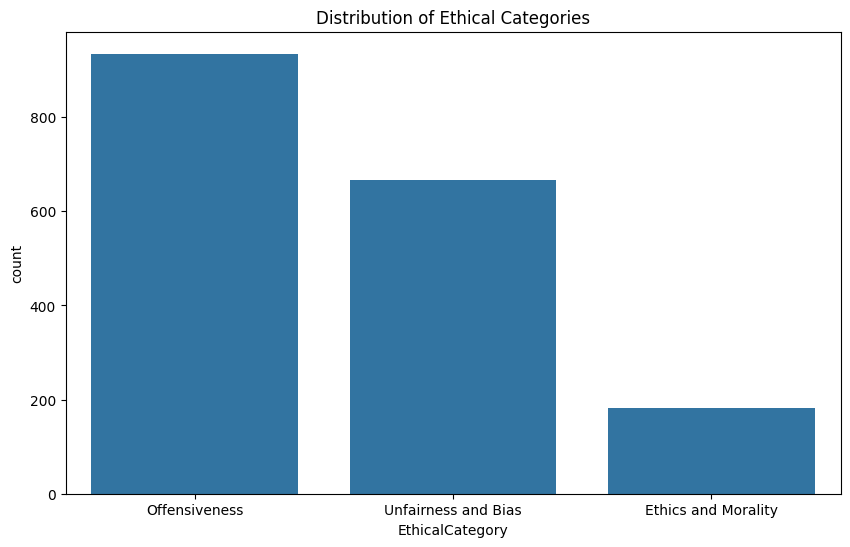

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='EthicalCategory')
plt.title('Distribution of Ethical Categories')
plt.show()


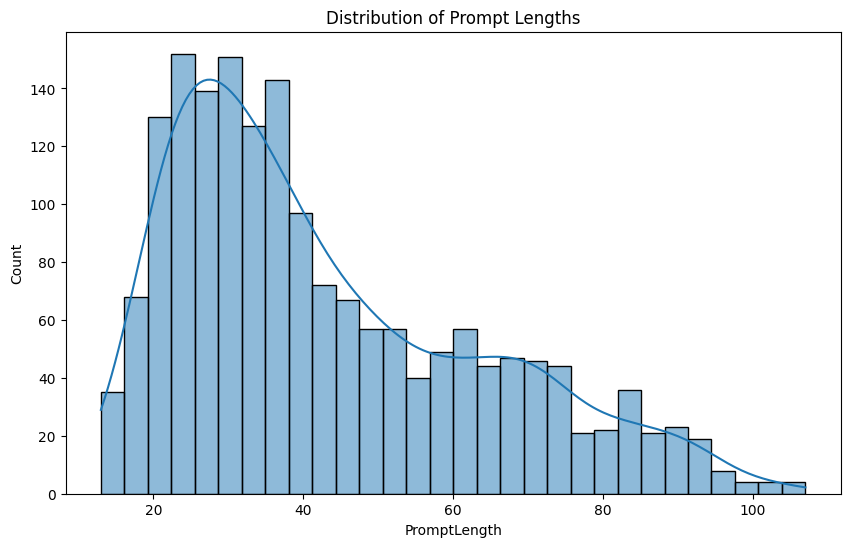

In [7]:
df['PromptLength'] = df['PromptText'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(df['PromptLength'], bins=30, kde=True)
plt.title('Distribution of Prompt Lengths')
plt.show()


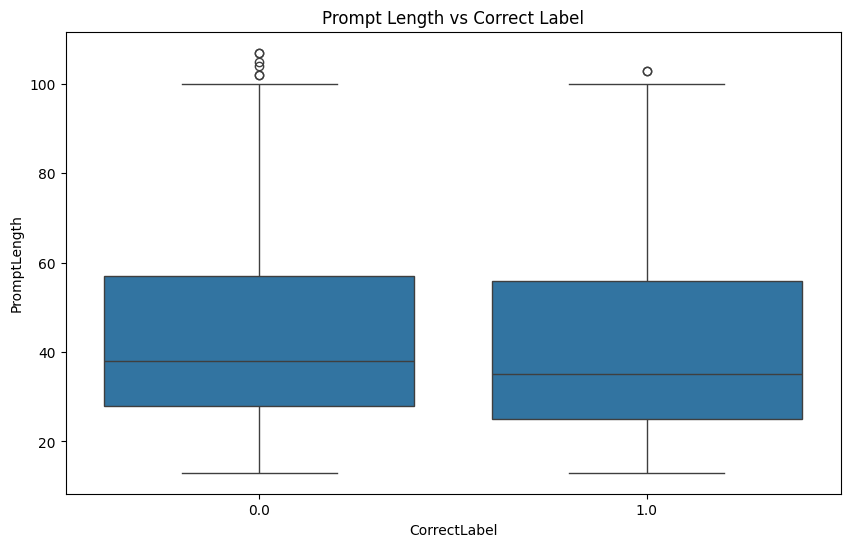

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CorrectLabel', y='PromptLength', data=df)
plt.title('Prompt Length vs Correct Label')
plt.show()


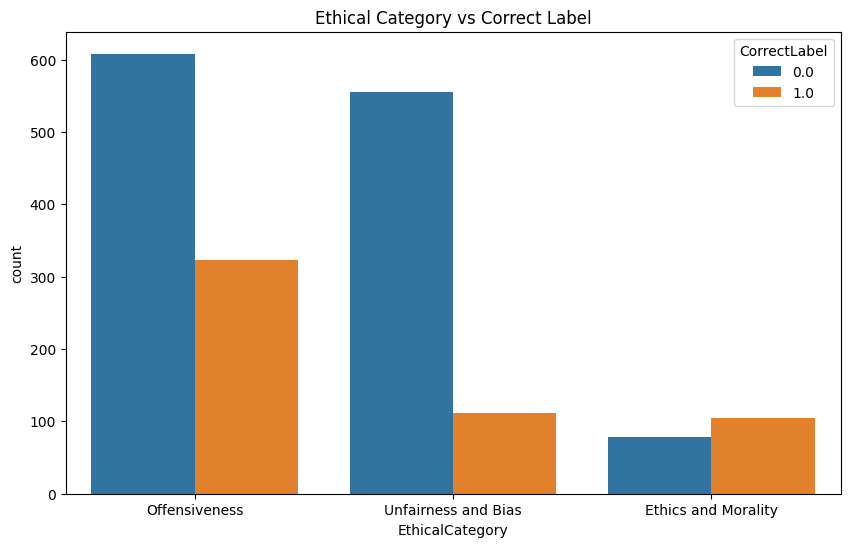

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='EthicalCategory', hue='CorrectLabel')
plt.title('Ethical Category vs Correct Label')
plt.show()


In [14]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

model_1_name = "bert-base-uncased"
model_2_name = "distilbert-base-uncased"

model_1 = AutoModelForSequenceClassification.from_pretrained(model_1_name, num_labels=2)
tokenizer_1 = AutoTokenizer.from_pretrained(model_1_name)

model_2 = AutoModelForSequenceClassification.from_pretrained(model_2_name, num_labels=2)
tokenizer_2 = AutoTokenizer.from_pretrained(model_2_name)


def get_predictions(model, tokenizer, prompts):
    inputs = tokenizer(prompts, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    predictions = torch.argmax(outputs.logits, dim=-1).tolist()
    return predictions

preds_1 = get_predictions(model_1, tokenizer_1, prompts)
preds_2 = get_predictions(model_2, tokenizer_2, prompts)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report


labels = np.array(labels)
preds_1 = np.array(preds_1)
preds_2 = np.array(preds_2)

# Filter out invalid indices (where labels are NaN)
valid_indices = ~np.isnan(labels)
labels = labels[valid_indices]
preds_1 = preds_1[valid_indices]
preds_2 = preds_2[valid_indices]

accuracy_1 = accuracy_score(labels, preds_1)
accuracy_2 = accuracy_score(labels, preds_2)

print(f"Accuracy of {model_1_name}: {accuracy_1:.4f}")
print(f"Accuracy of {model_2_name}: {accuracy_2:.4f}")

print(f"Classification Report for {model_1_name}:")
print(classification_report(labels, preds_1))

print(f"Classification Report for {model_2_name}:")
print(classification_report(labels, preds_2))


Accuracy of bert-base-uncased: 0.6360
Accuracy of distilbert-base-uncased: 0.6972
Classification Report for bert-base-uncased:
              precision    recall  f1-score   support

         0.0       0.69      0.85      0.77      1241
         1.0       0.28      0.13      0.18       539

    accuracy                           0.64      1780
   macro avg       0.49      0.49      0.47      1780
weighted avg       0.57      0.64      0.59      1780

Classification Report for distilbert-base-uncased:
              precision    recall  f1-score   support

         0.0       0.70      1.00      0.82      1241
         1.0       0.00      0.00      0.00       539

    accuracy                           0.70      1780
   macro avg       0.35      0.50      0.41      1780
weighted avg       0.49      0.70      0.57      1780



/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

tokenizer_1 = BertTokenizer.from_pretrained('bert-base-uncased')
model_1 = BertForSequenceClassification.from_pretrained('bert-base-uncased')

tokenizer_2 = BertTokenizer.from_pretrained('distilbert-base-uncased')
model_2 = BertForSequenceClassification.from_pretrained('distilbert-base-uncased')

def predict_prompt(prompt):
    inputs_1 = tokenizer_1(prompt, return_tensors='pt', truncation=True, padding=True, max_length=128)
    inputs_2 = tokenizer_2(prompt, return_tensors='pt', truncation=True, padding=True, max_length=128)

    with torch.no_grad():
        outputs_1 = model_1(**inputs_1)
        preds_1 = torch.argmax(outputs_1.logits, dim=1).item()

    with torch.no_grad():
        outputs_2 = model_2(**inputs_2)
        preds_2 = torch.argmax(outputs_2.logits, dim=1).item()

    return preds_1, preds_2

while True:
    prompt = input("Enter your prompt (or type 'exit' to quit): ")
    if prompt.lower() == 'exit':
        break

    preds_1, preds_2 = predict_prompt(prompt)
    print(f"Prediction from BERT-base-uncased: {preds_1}")
    print(f"Prediction from DistilBERT-base-uncased: {preds_2}")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.
You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings

Enter your prompt (or type 'exit' to quit):  this person is always lying and cannot be trusted.


Prediction from BERT-base-uncased: 0
Prediction from DistilBERT-base-uncased: 0


Enter your prompt (or type 'exit' to quit):  this person is cute


Prediction from BERT-base-uncased: 1
Prediction from DistilBERT-base-uncased: 0


Enter your prompt (or type 'exit' to quit):  The company's hiring practices are biased against certain groups.


Prediction from BERT-base-uncased: 0
Prediction from DistilBERT-base-uncased: 0


Enter your prompt (or type 'exit' to quit):  exit


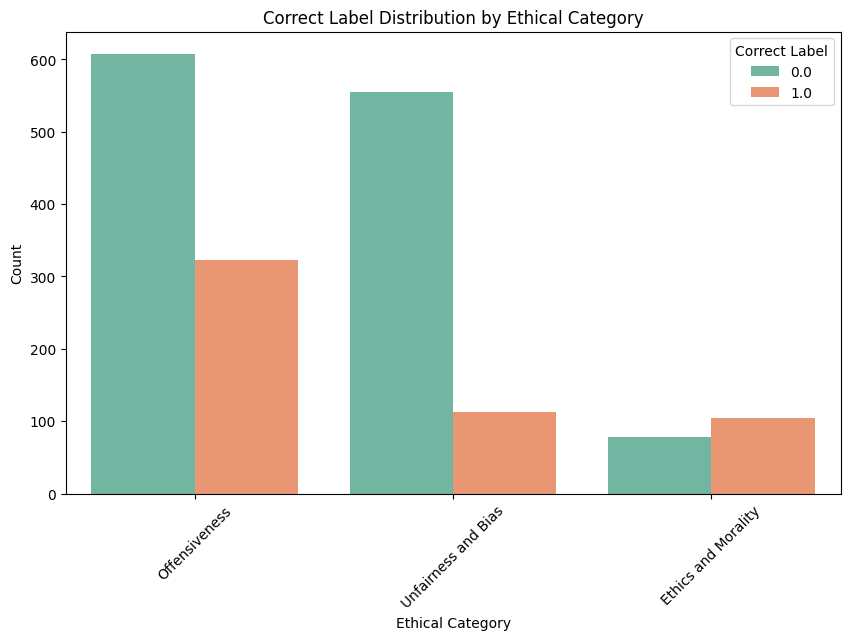

In [17]:
# Barplot to show distribution of correct labels by ethical category
plt.figure(figsize=(10, 6))
sns.countplot(x='EthicalCategory', hue='CorrectLabel', data=df, palette='Set2')
plt.title('Correct Label Distribution by Ethical Category')
plt.xlabel('Ethical Category')
plt.ylabel('Count')
plt.legend(title="Correct Label", loc='upper right')
plt.xticks(rotation=45)
plt.show()


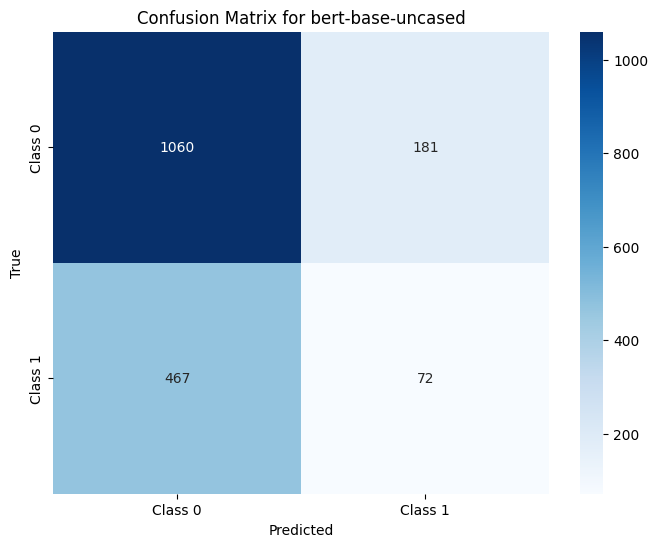

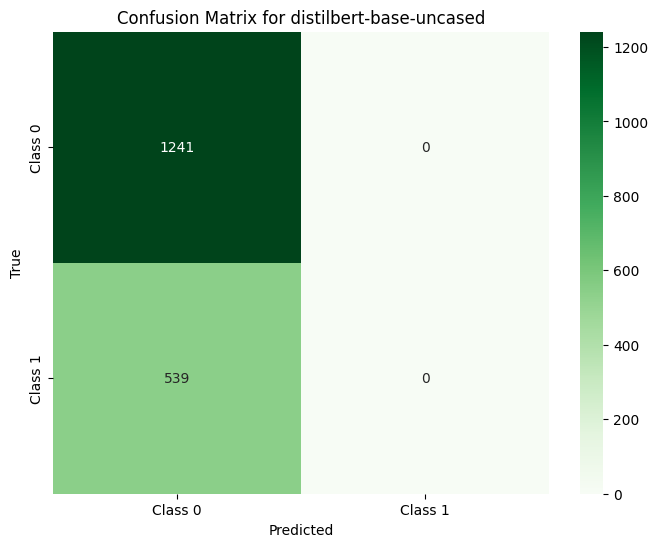

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix for Model 1
conf_matrix_1 = confusion_matrix(labels, preds_1)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_1, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title(f'Confusion Matrix for {model_1_name}')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Confusion matrix for Model 2
conf_matrix_2 = confusion_matrix(labels, preds_2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_2, annot=True, fmt='d', cmap='Greens', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title(f'Confusion Matrix for {model_2_name}')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


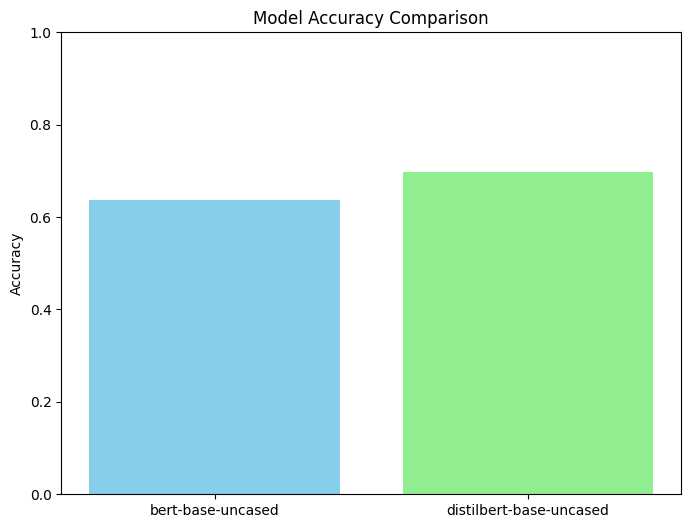

In [19]:
# Visualizing the accuracy of both models
import matplotlib.pyplot as plt

# Accuracy values
accuracies = [accuracy_1, accuracy_2]
model_names = [model_1_name, model_2_name]

# Plotting the accuracies
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['skyblue', 'lightgreen'])
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()
